# SD TSIA 211 : TP 1

## Q1

There are 400 images. Each of them are made of 10 304 pixels whiwh can take a value between 0 and 255.

## Q2

First, we look at a simple cas with $n = p = 1$ (so $k = 1$)

The objective function is $F_m(h,w) = \frac{1}{2} \times (m - hw)^2$.

If we compute the gradient, we get $\begin{pmatrix} hw^2 - wm\\h^2w - hm\end{pmatrix}$.

Then we can compute the Hessian Matrix :
$\begin{pmatrix} 
w^2 & 2hw -m\\
2hw - m & h^2 
\end{pmatrix}$.

Finally the function is convex <=> The hessian is positive semi-definite
which is equivalent to the hessian has all it's eigen value greater or equal to zero.

But if we compute the determinant which is the product of the eigen value, we get :
$\Delta = 4hwm - 3h^2w^2 - 4m^2$ 

At m and w fixed, we have $\Delta -> -\infty$ when $h -> \infty$. It means that it exists h such that for any m, w, we have $\Delta \lt 0$.

<b>Thus the objective function is not convex in the case n = p = 1.</b>

Let's compute the gradient in the general case :

$F(W,H) = \frac{1}{2np} \sum_i\sum_l (M_{i,l}-\sum_jW_{i,j}H_{j,l})$

$\frac{\partial F}{\partial W_{i,j}} = \su$

Garder la feuille


## Q3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.sparse
import scipy.sparse.linalg

In [3]:
def build_matrix_from_faces(folder='orl_faces', minidata=False):
    # load images
    # 400 images of size (112, 92)
    M = []
    if minidata is True:
        nb_subjects = 1
    else:
        nb_subjects = 40
    for subject in range(1, nb_subjects + 1
                        ):
        for image in range(1, 11):
            face = plt.imread(folder + '/s' + str(subject)
                              + '/' + str(image) + '.pgm')
            M.append(face.ravel())

    return np.array(M, dtype=float)

def vectorize(W, H):
    return np.concatenate((W.ravel(), H.ravel()))

def unvectorize_M(W_H, M):
    # number of elements in W_H is (n+p)*k where M is of size n x m
    # W has the nk first elements
    # H has the kp last elements
    n, p = M.shape
    k = W_H.shape[0] // (n + p)
    W = W_H[:n * k].reshape((n, k))
    H = W_H[n * k:].reshape((k, p))
    return W, H

In [4]:
# Small data to test the algorithm
M = build_matrix_from_faces(folder='orl_faces', minidata=True)
def unvectorize(W_H): return unvectorize_M(W_H, M)
k = 2

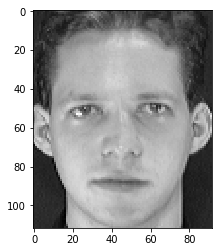

In [5]:
# To see the first face:
plt.imshow(M[0].reshape((112, 92)), cmap='gray'); plt.show()

In [110]:
W0, S, H0 = scipy.sparse.linalg.svds(M, k)
W0 = np.maximum(0, W0 * np.sqrt(S))
H0 = np.maximum(0,(H0.T * np.sqrt(S)).T)
L0 = np.sqrt(np.sum(np.dot(np.transpose(H0),H0)**2))/(400*92*112)

#### 3.1
It gives the solution if k = 1. More over all the coefficient are positives.
(But we could also have initialized it randomly !)

#### 3.2
The function is now convex. it's gradient is :
$$\frac{1}{np}(WH_0 - M)H_0^T $$

#### 3.3

In [84]:
def val_g(W):
    return np.sum((M-np.dot(W,H0))**2)/(2*400*112*92)

def grad_g(W):
    return np.dot((np.dot(W,H0) - M),np.transpose(H0))/(400*112*92) 

In [111]:
val_g(W0)

255.28510818239408

In [27]:
def projected_gradient_method(val_g, grad_g, W0, gamma, N):
    for i in range(N):
        W0 = W0 - gamma * grad_g(W0)
        
        #Projection on R+
        W0 = W0 * (W0>=0)
    return W0

In [116]:
W0 = projected_gradient_method(val_g, grad_g, W0, 1/L0, 100)

In [117]:
val_g(W0)

214.12129339197426